In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load the data
data = pd.read_csv('conversion_data.csv')

In [3]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [116]:
print([i for i in data.columns])

['country', 'age', 'new_user', 'source', 'total_pages_visited', 'converted']


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [6]:
# Exploratory data analysis to understand the data
# Step 1 : check for any null values in the data
data.isnull().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

In [7]:
data.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

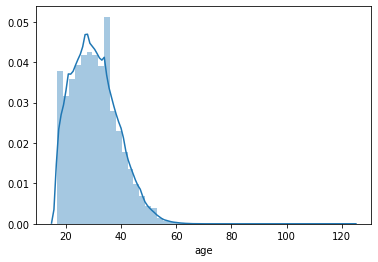

In [8]:
# Step 2: check for inconsistency in the data
# from descriptive stats it is clear that age has a incosistent value of 123
sns.distplot(data['age'])

In [9]:
data[data['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [10]:
# remove the bad data
data = data[data['age']<100]

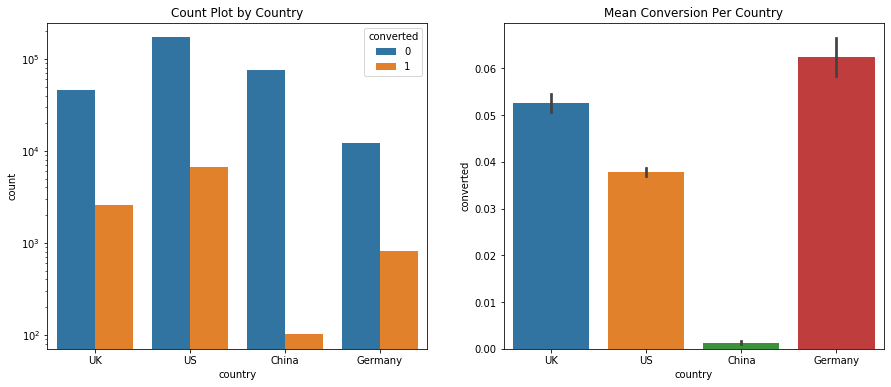

In [15]:
# check the relation between different country and the conversion rate
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='country',hue='converted',data=data,ax=ax1)
ax1.set_yscale('log')
ax1.set_title('Count Plot by Country')

sns.barplot(x='country',y='converted',data=data, ax=ax2)
ax2.set_title('Mean Conversion Per Country');

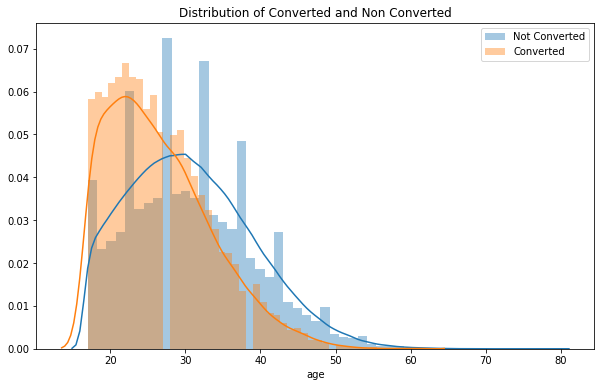

In [22]:
# check the relation between different age group and there conversion rate
fig, (ax1) = plt.subplots(1,1,figsize=(10,6))

sns.distplot(data[data['converted']==0]['age'],label='Not Converted',ax=ax1)
sns.distplot(data[data['converted']==1]['age'],label='Converted',ax=ax1)
ax1.set_title('Distribution of Converted and Non Converted')

plt.legend();

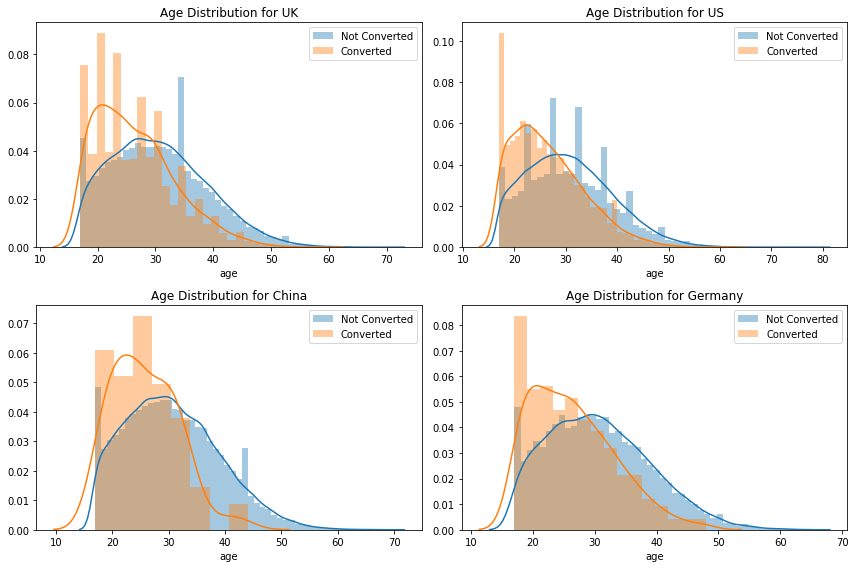

In [39]:
# Analyze the age distribution with respect to different country and Conversion rate
age_data = data[['country','age','converted']]
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8))

for i,j in zip(age_data['country'].unique(),(ax1,ax2,ax3,ax4)):
    sns.distplot(age_data[(age_data['converted']==0)&(age_data['country']==i)]['age'],label='Not Converted',ax=j)
    sns.distplot(age_data[(age_data['converted']==1)&(age_data['country']==i)]['age'],label='Converted',ax=j)
    j.legend()
    j.set_title('Age Distribution for {}'.format(i))
plt.tight_layout()

In [114]:
# plot mean converted vs ages
grp_data = data.groupby('age').mean().reset_index()

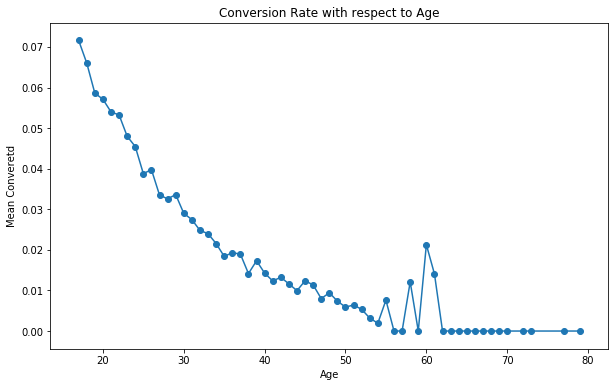

In [115]:
plt.figure(figsize=(10,6))
plt.plot(grp_data['age'],grp_data['converted'])
plt.scatter(grp_data['age'],grp_data['converted'])
plt.xlabel('Age')
plt.ylabel('Mean Converetd')
plt.title('Conversion Rate with respect to Age');

No handles with labels found to put in legend.


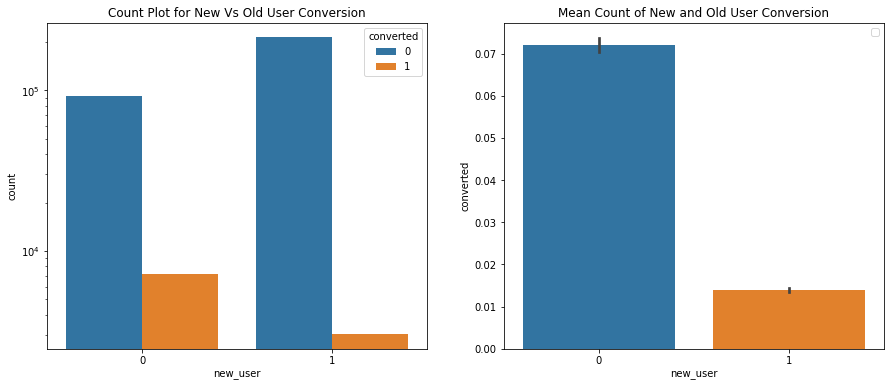

In [26]:
# check relation between new user and conversion
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='new_user',hue='converted',data=data,ax=ax1)
ax1.set_yscale('log')
ax1.set_title('Count Plot for New Vs Old User Conversion');

sns.barplot(x='new_user',y='converted',data=data,ax=ax2)
ax2.set_title('Mean Count of New and Old User Conversion')
plt.legend()

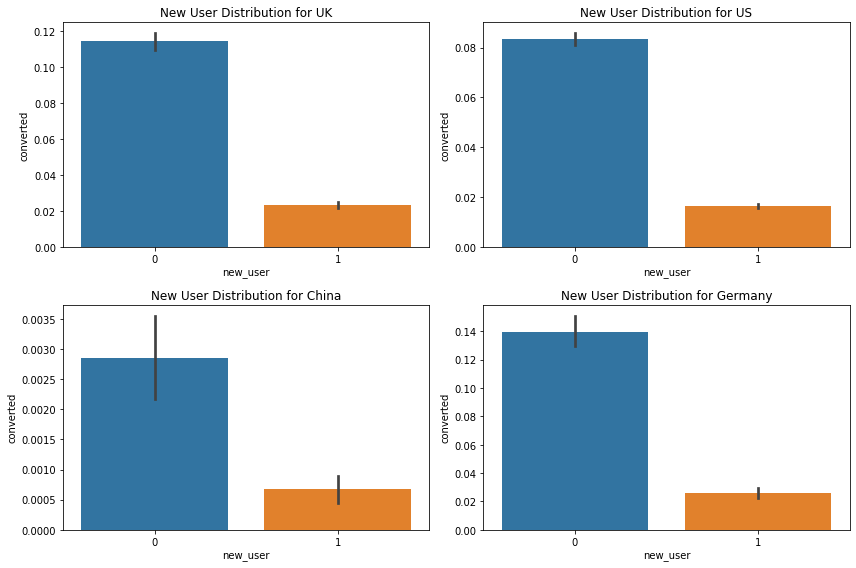

In [53]:
new_user = data[['country','age','converted','new_user']]
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8))

for i,j in zip(new_user['country'].unique(),(ax1,ax2,ax3,ax4)):
    sns.barplot(x='new_user', y='converted', data=new_user[new_user['country']==i],ax=j)
    j.set_title('New User Distribution for {}'.format(i))
plt.tight_layout()

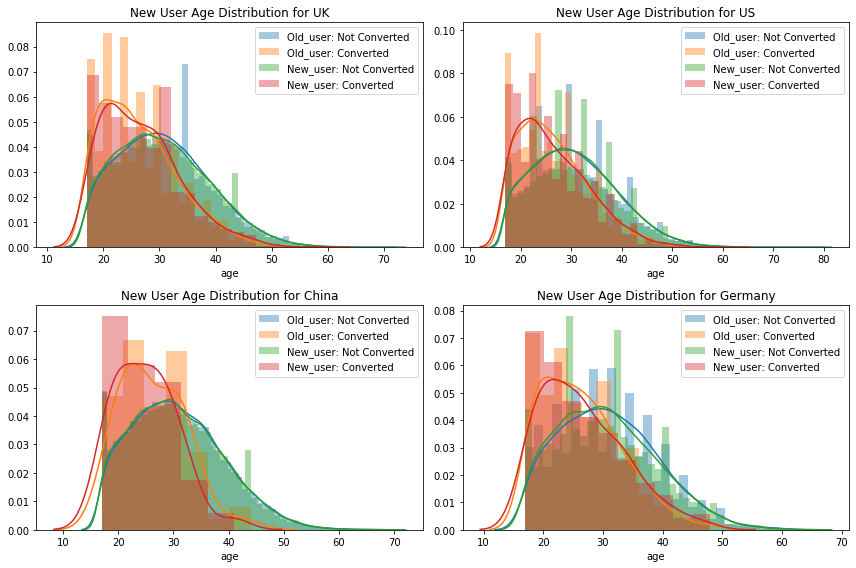

In [62]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8))

for i,j in zip(new_user['country'].unique(),(ax1,ax2,ax3,ax4)):
    sns.distplot(new_user[(new_user['converted']==0)&(new_user['new_user']==0)&(new_user['country']==i)]['age'],ax=j, label='Old_user: Not Converted')
    sns.distplot(new_user[(new_user['converted']==1)&(new_user['new_user']==0)&(new_user['country']==i)]['age'],ax=j, label='Old_user: Converted')
    sns.distplot(new_user[(new_user['converted']==0)&(new_user['new_user']==1)&(new_user['country']==i)]['age'],ax=j, label='New_user: Not Converted')
    sns.distplot(new_user[(new_user['converted']==1)&(new_user['new_user']==1)&(new_user['country']==i)]['age'],ax=j, label='New_user: Converted')
    j.set_title('New User Age Distribution for {}'.format(i))
    j.legend()
plt.tight_layout()

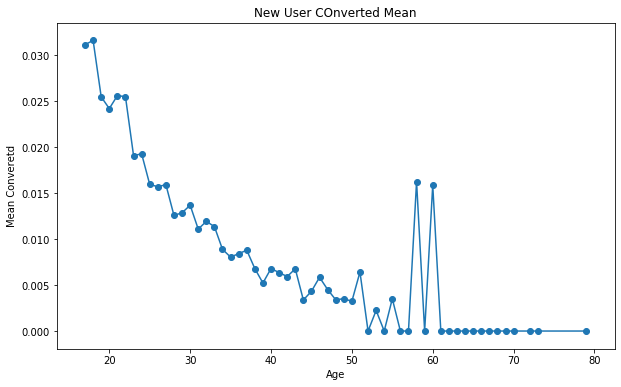

In [113]:
grp_data = data[data['new_user']==1].groupby('age').mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(grp_data['age'],grp_data['converted'])
plt.scatter(grp_data['age'],grp_data['converted'])
plt.xlabel('Age')
plt.ylabel('Mean Converetd')
plt.title('New User COnverted Mean');

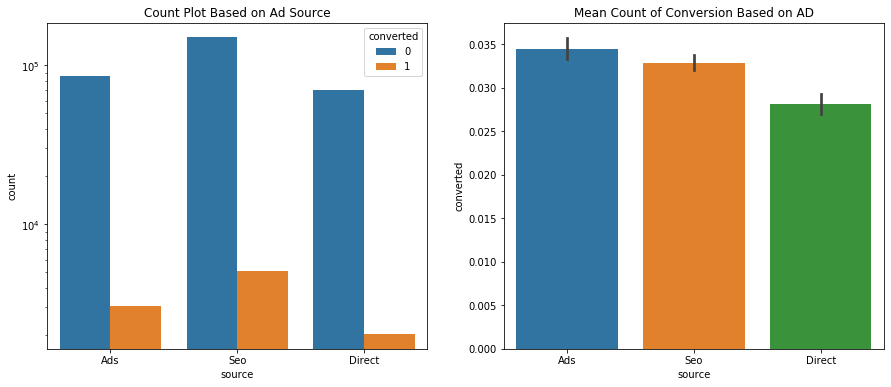

In [27]:
# check the relation between source and conversion
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='source',hue='converted',data=data,ax=ax1)
ax1.set_yscale('log')
ax1.set_title('Count Plot Based on Ad Source')

sns.barplot(x='source',y='converted',data=data,ax=ax2)
ax2.set_title('Mean Count of Conversion Based on AD');

In [68]:
# # analye the conversion rate wrt source, new user, country 
# # plot 1 >> check the relation between different sources and the countries combined effect on the conversion rate

# fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8))

# for i,j in zip(new_user['country'].unique(),(ax1,ax2,ax3,ax4)):
#     sns.barplot(x='country', y='converted',hue='source', data=data[data['country']==i],ax=j)
#     #j.set_title('New User Distribution for {}'.format(i))
# plt.tight_layout()
# #sns.barplot(x='country', y='converted', hue='source', data= data)

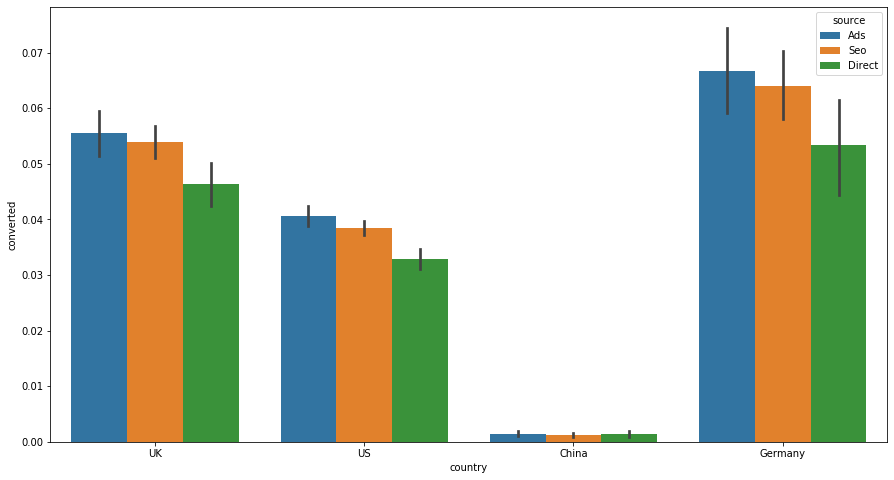

In [67]:
plt.figure(figsize=(15,8))
sns.barplot(x='country', y='converted', hue='source', data= data)

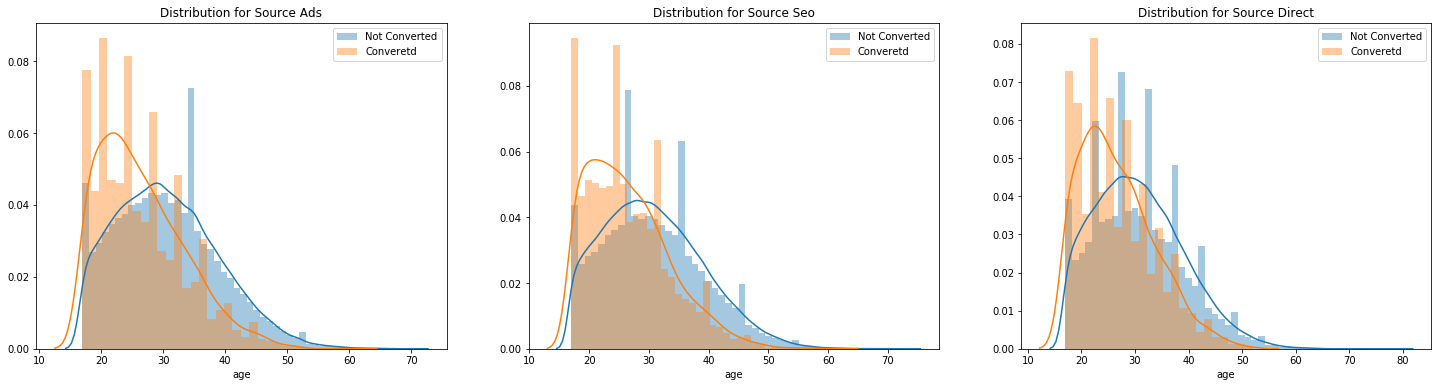

<Figure size 720x432 with 0 Axes>

In [87]:
# plot 2>> check how different ad sources affect the age 
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3,figsize=(25,6))
plt.figure(figsize=(10,6))
for i,j in zip(data['source'].unique(),(ax1,ax2,ax3)):
    sns.distplot(data[(data['source']==i)&(data['converted']==0)]['age'],label='Not Converted',ax=j)
    sns.distplot(data[(data['source']==i)&(data['converted']==1)]['age'],label='Converetd',ax=j)
    j.set_title('Distribution for Source {}'.format(i))
    j.legend()
#plt.title('Age Distribution ')

In [ ]:
# converted vs not converted with respect to age


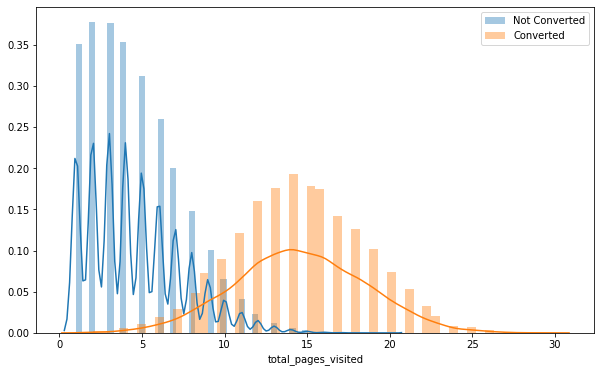

In [88]:
# relation between total pages visited and conversion rate
plt.figure(figsize=(10,6))
sns.distplot(data[data['converted']==0]['total_pages_visited'],label='Not Converted')
sns.distplot(data[data['converted']==1]['total_pages_visited'],label='Converted')
plt.legend()

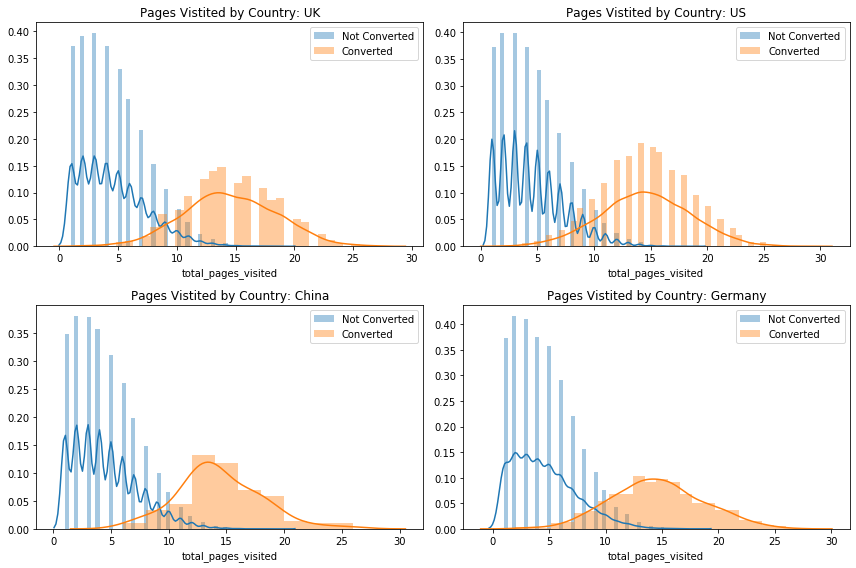

In [94]:
# plot the pages visited with different country
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8))
for i,j in zip(data['country'].unique(),(ax1,ax2,ax3,ax4)):
    sns.distplot(data[(data['country']==i)&(data['converted']==0)]['total_pages_visited'],ax=j,label='Not Converted')
    sns.distplot(data[(data['country']==i)&(data['converted']==1)]['total_pages_visited'],ax=j, label='Converted')
    j.legend()
    j.set_title('Pages Vistited by Country: {}'.format(i))
plt.tight_layout()

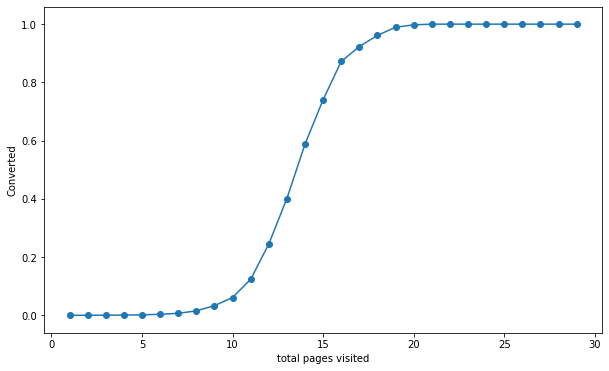

In [100]:
# converetd mean vs total pages visited
plt.figure(figsize=(10,6))
grp_data = data.groupby('total_pages_visited').mean().reset_index()
plt.scatter(grp_data['total_pages_visited'],grp_data['converted'])
plt.plot(grp_data['total_pages_visited'],grp_data['converted'])
plt.xlabel('total pages visited')
plt.ylabel('Converted');

In [148]:
# checking for ratio of total users 
for i,j in zip(data['country'].unique(),(data['country'].value_counts())/ len(data) *100):
    print('Total User for {} is about {}%  of total dataset'.format(i, np.round(j,2)))

Total User for UK is about 56.32%  of total dataset
Total User for US is about 24.23%  of total dataset
Total User for China is about 15.32%  of total dataset
Total User for Germany is about 4.13%  of total dataset


# Machine Learning Algorithms

 The original data set has categorical sections as well, we convert then into numerical values using one hot encoding

In [117]:
new_data = data.loc[:,([i for i in data.columns])]

In [118]:
new_data = pd.get_dummies(new_data)

In [119]:
new_data.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [157]:
# the ratio of convverted to not converted
print('The ratio of converted users in entire dataset : %f'%((new_data[new_data['converted']==1]['converted']).value_counts()/len(new_data)))
print('The ratio of not converted users in entire dataset : %f'%((new_data[new_data['converted']==0]['converted']).value_counts()/len(new_data)))

The ratio of converted users in entire dataset : 0.032252
The ratio of not converted users in entire dataset : 0.967748


This is imbalanced dataset

In [161]:
from sklearn.model_selection import train_test_split

In [166]:
# split the dataset into train and test
train_x, test_x, train_y, test_y = train_test_split(new_data.drop(['converted'],axis=1),new_data['converted'],test_size=0.3,random_state=42)

In [167]:
# check the train and test target data for mean values
print('Mean Converted for train dataset: {}'.format(train_y.mean()))
print('Mean Converted for test dataset: {}'.format(test_y.mean()))

Mean Converted for train dataset: 0.03237582340131383
Mean Converted for test dataset: 0.0319628926839553


In [168]:
np.logspace(-3,3,10)

array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])

classify using logistic regression

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [180]:
# define the model
log_reg = LogisticRegression()

# regularization parameters
penalty = ['l1','l2']

# regularize hyperparameter space
C = np.logspace(-3,3,10)

# create dict for hyperparameters
hyper_param = dict(C=C, penalty=penalty)

#create grid search using 5 fold cross validation
clf = GridSearchCV(log_reg,hyper_param, cv=5, verbose=1)

# fit the model to the grid search
best_model = clf.fit(train_x,train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

In [184]:
# print The best model configuration
print('Optimum Penalty: {}'.format(best_model.best_estimator_.get_params()['penalty']))
print('Optimum C: {}'.format(best_model.best_estimator_.get_params()['C']))

Optimum Penalty: l1
Optimum C: 10.0


In [186]:
best_model.score(train_x,train_y)

0.9859761992970028

In [187]:
best_model.score(test_x,test_y)

0.986675100147586

In [189]:
1- test_y.mean()

0.9680371073160448

In [194]:
best_model.best_estimator_.get_params()

{'C': 10.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [198]:
y_test_pred = best_model.predict(test_x)

In [199]:
print( classification_report(y_true=test_y, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91828
           1       0.86      0.70      0.77      3032

    accuracy                           0.99     94860
   macro avg       0.93      0.85      0.88     94860
weighted avg       0.99      0.99      0.99     94860



In [202]:
predict_prob = best_model.predict_proba(test_x)[:,1]

In [203]:
predict_prob = [1 if i>0.25 else 0 for i in predict_prob]

In [205]:
# Analyze the 
print( classification_report(y_true=test_y, y_pred=predict_prob))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91828
           1       0.71      0.80      0.75      3032

    accuracy                           0.98     94860
   macro avg       0.85      0.89      0.87     94860
weighted avg       0.98      0.98      0.98     94860

